In [ ]:
# Adventures on Machine Learning (2)
# Handling with images and forecasting
# by Paulo Francisco da Silva Junior

In [ ]:
#Importações
import numpy as np
import pandas as pd
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras.optimizers import SGD
from random import seed
from keras.models import Model
import pickle

In [ ]:
import os
os.getcwd() #sabendo o diretorio que o python está

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


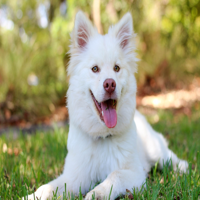

In [ ]:
#caminho dos conteudos
caminho="/content/drive/MyDrive/ML02/"
#Caminho dividido em ML02 -> dog ; gato
#abrindo uma imagem especifica
i = Image.open(caminho+"train/dog/dog1.jpg")
#Modificando tamanho da imagem
i = i.resize((200,200))
#Mostrando imagem
display(i)

In [ ]:
#Função construtora do modelo
def criandoModelo1():
  #Criando construtor do modelo by keras
  #Modelo sequencial bom apenas para poucas entradas e saidas
  model = Sequential()
  #Adicionando camadas neurais
  #Dense -> camada densa  (Dimensão=30) #unidades de neuronios
  #Activation -> Modo de transferência entre camadas
  #Relu -> Aplica a função de ativação da unidade linear retificada. Negativos -> 0
  #Kernel = Normal -> Transforma numa distribuição normal
  model.add(Dense(30,activation="relu",kernel_initializer='normal'))
  #Adicinando 2 camada etc
  model.add(Dense(70,activation="relu",kernel_initializer='normal'))
  #Sigmoid -> Aplica a função de ativação sigmoid. Conversão para output binário
  model.add(Dense(35,activation="sigmoid",kernel_initializer='normal'))
  #Camada final a 1 dimensão para um resultado
  model.add(Dense(1,activation="relu",kernel_initializer='normal'))
  #SGD -> Otimizador de descida gradiente ; Lembre-se de derivada gradiente
  #lr -> learning rate
  #momentum -> aceleração do gradiente em valor
  #Nesterov -> aceleração do gradiente em boolean, chave de ativação
  #Decay -> Decadência da taxa de aprendizado ao longo tempo
  otimizadorSGD = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
  #Compilando modelo
  #Perda por erro quadrático médio e metrica de precisão -> Calcula com que frequência as previsões são etiquetas iguais.
  model.compile(loss='mean_squared_error', optimizer=otimizadorSGD, metrics=['accuracy'])
  return model
  #rodando criação
  criandoModelo1()

In [ ]:
#Isso implementa interface de classificador scikit-learn. (Lembre-se de sklearn)
#build_fn=FuncaoModelo, nb_epoch= número de repetições, batch_size=nº divisões dos dados, verbose=acompanhar progresso)
#Verbose -> 0, 1 ou 2. onde 0 = silencioso, 1 = barra de progresso, 2 = uma linha por época. 
estimacao1 = KerasClassifier(build_fn=criandoModelo1, nb_epoch=10, batch_size=5, verbose=2) 

In [ ]:
#Pasta de Treinamento
pastaTreino=caminho+"train/"
#Pasta de validacao
pastaValidacao=caminho+"valid/"
#Criando lista para input dos valores
fotos, valorFoto = list(), list()
pastas1 = [pastaTreino+"cat/",pastaTreino+"dog/"]

In [ ]:
#Adicionando fotos de treinamento de gatos na lista
for pasta201 in pastas1:
  for file in os.listdir(pasta201):
    saida=0.0
    if(file.startswith("gato")):
      saida=1.0
    foto = load_img(pasta201 + file, target_size=(200, 200))
    foto = img_to_array(foto)
    fotos.append(foto)
    valorFoto.append(saida)

In [ ]:
#Printando resultado; Lembre-se -> Cachorro:0 ; Gato:1
valorFoto

[1.0, 1.0, 1.0, 0.0, 0.0, 0.0]

In [ ]:
###################### OBSERVAÇÕES ########################
#A camada pooling irá redizur a resolução da imagem final para lidar com diferentes posições das características identificadas.
#Maximum Pooling (or Max Pooling): Calcula o valor máximo para cada parte de um mapa de características.
#Average Pooling: Calcula o valor médio para cada parte de um mapa de características.
#Juntas, essas camadas formam um bloco e esses blocos podem ser repetidos onde o número de filtros em cada bloco 
#podem ser augmentados com a profundidade da rede (32, 64, 128, 256) para os primeiros 4 blocos do modelo.
#Padding é utilizado em uma camada convolucional de forma a garantir que a largura e altura do output da camada igualem ao input da imagem.
#Cada camada utiizará a função de ativação ReLU e a inicialização He. 
#A ativação define a convergência e sua velocidade. 
#Os pesos da inicialização devem preservar média e variância dos dados ao longo das camadas.
#ReLU: transforma valores negativos da distribuição em zeros. 
#Portanto, não preservaremos a média e a variância nos dados. De fato, a reduziremos pela metade a cada camada. 
#He: Adiciona 2 no numerador para lidar com o problema do ReLu.
#O modelo será fitado com o stochastic gradient descent com taxa de aprendizado de 0.001 e momentum de 0.9
#Como o problema é de uma classificação binária, uma camada de output de dimensão 1 será utilizada com ativação sigmoid.}

In [ ]:
def criarModelo2():
  model = Sequential()
  #Camada convulucional 2d de entrada, imagem 200x200 rgb
  #kernel_size: Um inteiro ou tupla/lista de 2 inteiros, especificando a altura e largura da janela de convolução 2D -> (3,3)
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
  model.add(MaxPooling2D((2, 2)))
  #Achata a entrada. Não afeta o tamanho do lote.
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(1, activation='sigmoid'))
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model
  criarModelo2()

In [ ]:
#Gráfico sobre perda acuracia
#dei copy e foda-se, da pra entender
def diagnostico(history):
    # loss
    pyplot.subplot(211)
    pyplot.title('Perda')
    pyplot.plot(history.history['loss'], color='blue', label='Treino')
    pyplot.plot(history.history['val_loss'], color='orange', label='Validacao')
    # accuracy
    print("\n")
    pyplot.subplot(212)
    pyplot.title('Precisão')
    pyplot.plot(history.history['accuracy'], color='blue', label='Treino')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='Validacao')
    # mostrar plot
    pyplot.legend()
    pyplot.show()

In [ ]:
################################ Notas #####################################
#ImageDataGenerator -> irá escalonar os valores dos pixels em nossas imagens para valores entre 0 e 1.
#flow_from_directory() no gerador dos dados (datagen) e criaremos um iterador para cada diretório (train/ e test/)
#Especificar que o problema é de classificação binária através do argumento “class_mode”
#Especificar imagens com tamanho de 200×200 pixels através do argumento “target_size”
#Fitar o modelo para treinamento (train_it) e teste (test_it) como a base de validação durante o treinamento.
#O número de passos a serem utilizados pelos iteradores devem ser especificados. Esse é o número de batches compostos em cada época.

In [ ]:
#De acordo com o datagen as pastas devem seguir a classificação abaixo:
#dataset -> treino & validacao
#treino -> classe1 & classe2 ...
#validacao -> classe1 & classe2 ...

In [ ]:
#Criando ambiente de execução
def modeloExec():
  seed(1)
  model = criarModelo2()
  datagen = ImageDataGenerator(rescale=1.0/255.0)
  treine=datagen.flow_from_directory(pastaTreino,class_mode='binary', batch_size=2, target_size=(200, 200))
  valide=datagen.flow_from_directory(pastaValidacao,class_mode='binary', batch_size=2, target_size=(200, 200))
  historico = model.fit(treine, steps_per_epoch=len(treine), validation_data=valide, validation_steps=len(valide), epochs=5, verbose=2)
  model.save("modelo.pkl")
  diagnostico(historico)

Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Epoch 1/5
3/3 - 5s - loss: 2.6845 - accuracy: 0.5000 - val_loss: 1.3814 - val_accuracy: 0.5000
Epoch 2/5
3/3 - 2s - loss: 12.0884 - accuracy: 0.1667 - val_loss: 4.1459 - val_accuracy: 0.5000
Epoch 3/5
3/3 - 2s - loss: 2.1365 - accuracy: 0.8333 - val_loss: 6.5483 - val_accuracy: 0.5000
Epoch 4/5
3/3 - 2s - loss: 2.8439 - accuracy: 0.6667 - val_loss: 0.7199 - val_accuracy: 0.5000
Epoch 5/5
3/3 - 2s - loss: 0.3369 - accuracy: 0.8333 - val_loss: 0.8238 - val_accuracy: 0.5000
INFO:tensorflow:Assets written to: modelo.pkl/assets




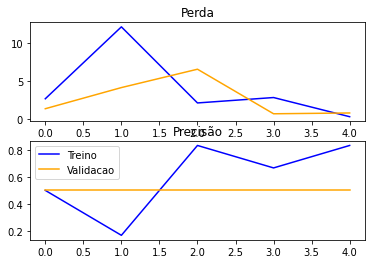

In [ ]:
#Execultando aprendizado do modelo
modeloExec()

In [ ]:
#Pasta de validação
pasta1="/content/drive/MyDrive/ML02/valid/cat/"
pasta2="/content/drive/MyDrive/ML02/valid/dog/"

#Carregando imagem, transformando em 200x200
def load_image(filename,folder):
    img = load_img(folder+filename, target_size=(200, 200))
    img = img_to_array(img)
    # redimensionar imagem
    img = img.reshape(1, 200, 200, 3)
    img = img.astype('float32')
    return img

#Prevendo uma imagem especifica
def prever(img,pasta):
  #Modelo
  modelo=criarModelo2()
  #Adaptando imagem
  img=load_image(img,pasta)
  #Adaptando resultado
  resultado = modelo.predict(img)
  if(resultado>=0.5):
    return "Gato"
  else:
    return "Dog"

In [ ]:
prever("dog12345.jpg","/content/drive/MyDrive/ML02/valid/cat/")

'Gato'

In [ ]:
prever("dog4.jpg","/content/drive/MyDrive/ML02/valid/dog/")

'Dog'

In [ ]:
prever("gato6.jpg",pasta1)

'Dog'

In [ ]:
#Prevendo várias imagens em todas as classes
resultados=list()
pastas=[pasta1,pasta2]
for x in pastas:
  for resultado in listdir(x):
    resposta = prever(resultado,x)
    resultados.append(resposta)
print(resultados)

['Gato', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog']


In [ ]:
# Modelo pra prevendo errado
# Humanos são mais inteligentes
# Resultado correto na ordem das pastas(pasta1,pasta2):
# Gato,Gato,Gato,Dog,Dog,Dog